# Análise Exploratória

## Pacotes e dados

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.dates import date2num
from datetime import datetime
import seaborn as sns
sns.set(style='ticks', font_scale=1.4)
import pyreadr

In [13]:
all_flights = pd.read_csv('C:/Users/yumin/Downloads/all_flights.csv')
rota_caipira = pd.read_csv('C:/Users/yumin/Downloads/rota_caipira.csv')
rota_solimoes = pd.read_csv('C:/Users/yumin/Downloads/rota_solimoes.csv')

## Missings e Duplicatas

In [14]:
print('MISSING NAS BASES DE DADOS:')
print(all_flights.isna().sum())
print(rota_caipira.isna().sum())
print(rota_solimoes.isna().sum())

print('')

MISSING NAS BASES DE DADOS:
Unnamed: 0           0
year_week            0
total_flights        0
average_duration     0
variance_duration    0
dtype: int64
Unnamed: 0           0
year_week            0
total_flights        0
average_duration     0
variance_duration    0
dtype: int64
Unnamed: 0           0
year_week            0
total_flights        0
average_duration     0
variance_duration    0
dtype: int64



In [15]:
print(f'Duplicatas: {all_flights.duplicated().sum()}, ({np.round(100*all_flights.duplicated().sum()/len(all_flights),1)}%)')
print(f'Duplicatas: {rota_caipira.duplicated().sum()}, ({np.round(100*rota_caipira.duplicated().sum()/len(rota_caipira),1)}%)')
print(f'Duplicatas: {rota_solimoes.duplicated().sum()}, ({np.round(100*rota_solimoes.duplicated().sum()/len(rota_solimoes),1)}%)')



Duplicatas: 0, (0.0%)
Duplicatas: 0, (0.0%)
Duplicatas: 0, (0.0%)


# EDA

## Estatísticas Descritivas e Covariância

In [16]:
estatisticas_solimoes = rota_solimoes[['total_flights', 'average_duration']].describe()

estatisticas_caipira = rota_caipira[['total_flights', 'average_duration']].describe()

covariancia_solimoes = rota_solimoes[['total_flights', 'average_duration']].cov().loc['total_flights', 'average_duration']

covariancia_caipira = rota_caipira[['total_flights', 'average_duration']].cov().loc['total_flights', 'average_duration']

print("Estatísticas Descritivas para Solimoes:")
print(estatisticas_solimoes)

print("\nEstatísticas Descritivas para Caipira:")
print(estatisticas_caipira)

print("\nCovariância entre total_flights e average_duration para Solimoes:", covariancia_solimoes)
print("Covariância entre total_flights e average_duration para Caipira:", covariancia_caipira)

Estatísticas Descritivas para Solimoes:
       total_flights  average_duration
count     205.000000        205.000000
mean      186.921951       2166.490773
std       112.479426        853.239197
min        19.000000        533.575758
25%       102.000000       1564.782051
50%       167.000000       2038.195652
75%       259.000000       2740.296296
max       537.000000       5243.122807

Estatísticas Descritivas para Caipira:
       total_flights  average_duration
count     205.000000        205.000000
mean      105.697561       1239.003408
std        82.697098       1293.880891
min         3.000000        198.876712
25%        52.000000        634.800000
50%        83.000000        989.755102
75%       135.000000       1493.759740
max       435.000000      14870.600000

Covariância entre total_flights e average_duration para Solimoes: -13091.617349825614
Covariância entre total_flights e average_duration para Caipira: -27744.989466363553


## Total de Voos

In [17]:
soma_all_flights = all_flights['total_flights'].sum()
soma_rota_caipira = rota_caipira['total_flights'].sum()
soma_rota_solimoes = rota_solimoes['total_flights'].sum()

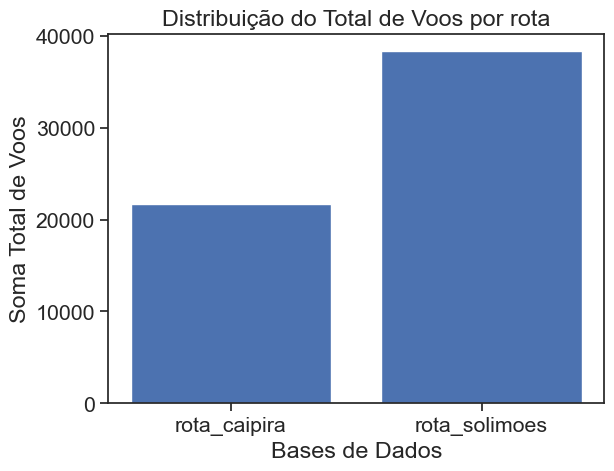

In [18]:
bases = ['rota_caipira', 'rota_solimoes']
somas = [ soma_rota_caipira, soma_rota_solimoes]

plt.bar(bases, somas)
plt.xlabel('Bases de Dados')
plt.ylabel('Soma Total de Voos')
plt.title('Distribuição do Total de Voos por rota')
plt.show() 

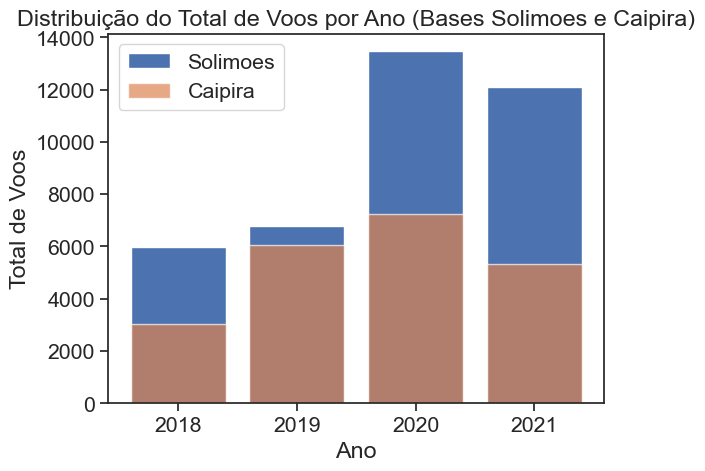

In [19]:
distribuicao_solimoes = rota_solimoes.groupby(rota_solimoes['year_week'].str[:4])['total_flights'].sum()

distribuicao_caipira = rota_caipira.groupby(rota_caipira['year_week'].str[:4])['total_flights'].sum()

plt.bar(distribuicao_solimoes.index, distribuicao_solimoes.values, label='Solimoes')
plt.bar(distribuicao_caipira.index, distribuicao_caipira.values, label='Caipira', alpha=0.7)  
plt.xlabel('Ano')
plt.ylabel('Total de Voos')
plt.title('Distribuição do Total de Voos por Ano (Bases Solimoes e Caipira)')
plt.legend()
plt.show()

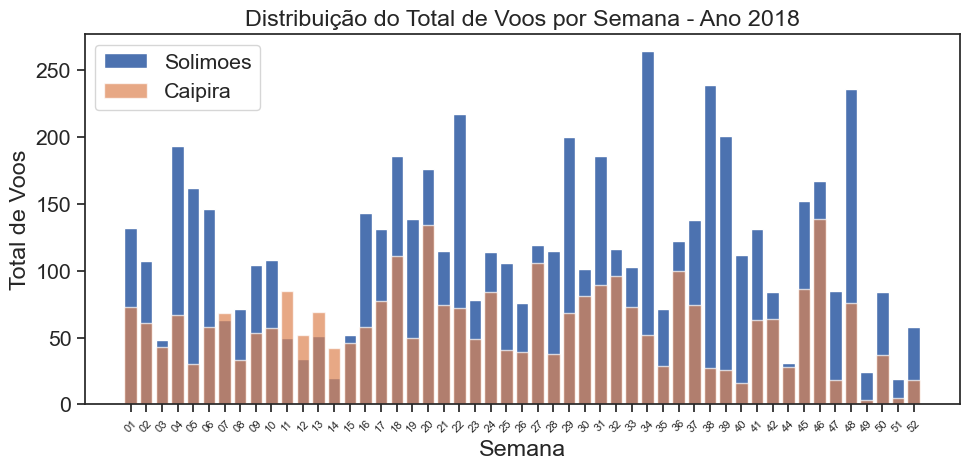

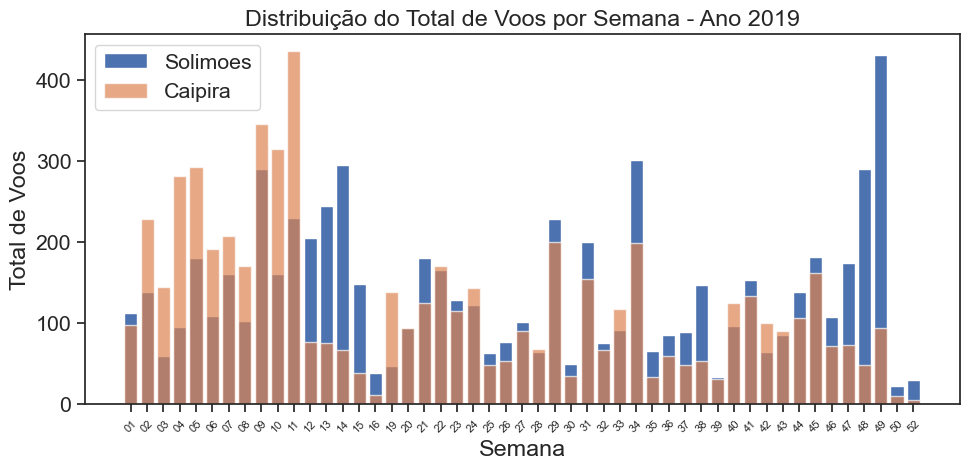

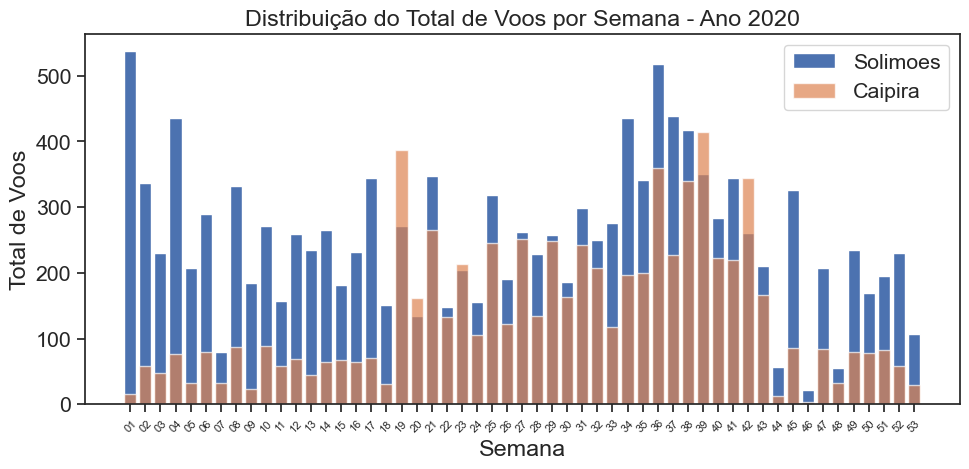

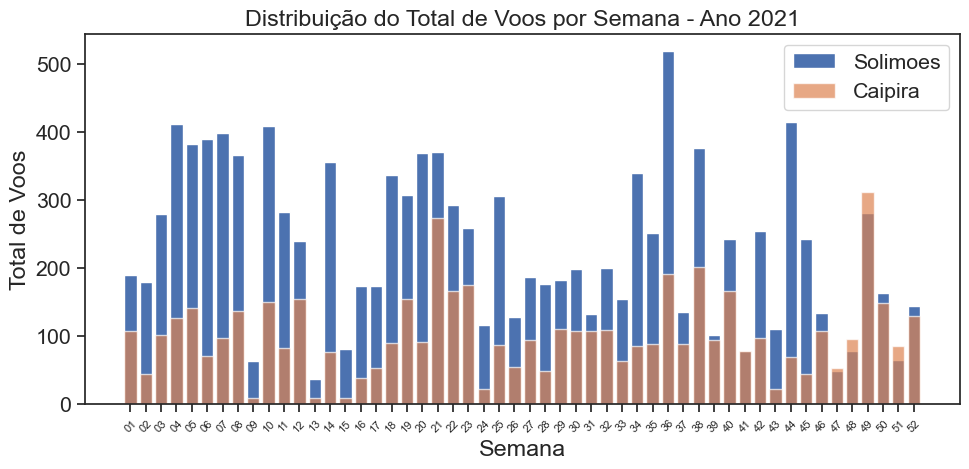

In [20]:
distribuicao_solimoes = rota_solimoes.groupby('year_week')['total_flights'].sum()

distribuicao_caipira = rota_caipira.groupby('year_week')['total_flights'].sum()

anos = ['2018', '2019', '2020', '2021']

for ano in anos:
    distribuicao_solimoes_ano = distribuicao_solimoes[distribuicao_solimoes.index.str.startswith(ano)]
    distribuicao_caipira_ano = distribuicao_caipira[distribuicao_caipira.index.str.startswith(ano)]

    plt.figure(figsize=(10, 5))
    plt.bar(distribuicao_solimoes_ano.index.str[-2:], distribuicao_solimoes_ano.values, label='Solimoes')
    plt.bar(distribuicao_caipira_ano.index.str[-2:], distribuicao_caipira_ano.values, label='Caipira', alpha=0.7)
    
    plt.xlabel('Semana')
    plt.ylabel('Total de Voos')
    plt.title(f'Distribuição do Total de Voos por Semana - Ano {ano}')
    plt.xticks(rotation=45, fontsize=8)  
    plt.legend()
    plt.tight_layout()
    plt.show()

Contatenando as semanas em meses:

In [21]:
rota_solimoes['year_month'] = pd.to_datetime(rota_solimoes['year_week'] + '-0', format='%Y_%U-%w').dt.strftime('%Y-%m')
rota_caipira['year_month'] = pd.to_datetime(rota_caipira['year_week'] + '-0', format='%Y_%U-%w').dt.strftime('%Y-%m')

print(rota_solimoes[['year_week', 'year_month']].head())
print(rota_caipira[['year_week', 'year_month']].head())


  year_week year_month
0   2018_01    2018-01
1   2018_02    2018-01
2   2018_03    2018-01
3   2018_04    2018-01
4   2018_05    2018-02
  year_week year_month
0   2018_01    2018-01
1   2018_02    2018-01
2   2018_03    2018-01
3   2018_04    2018-01
4   2018_05    2018-02


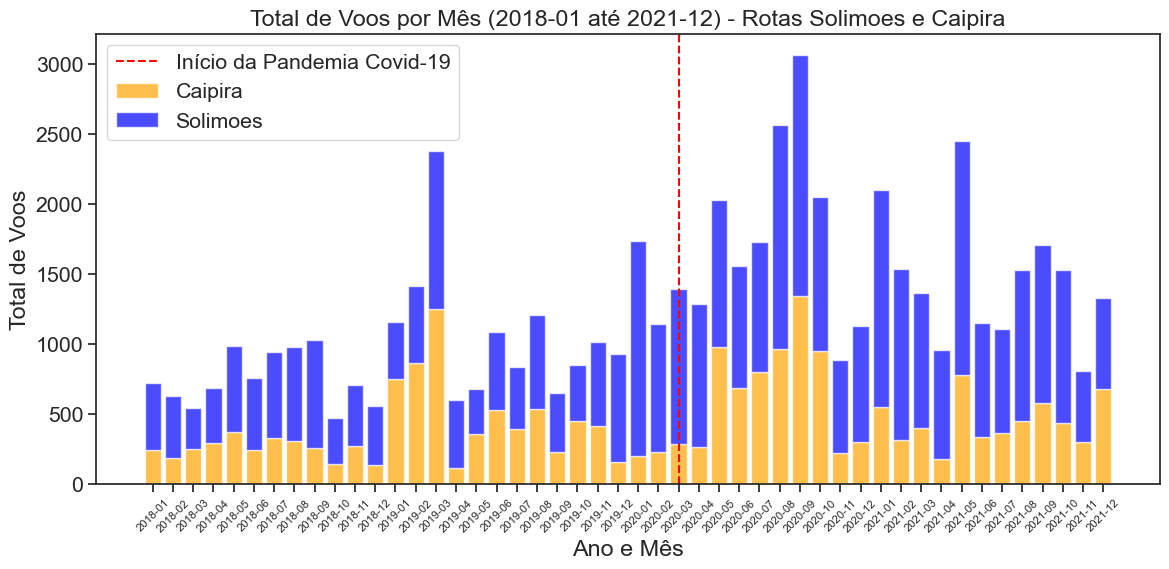

In [22]:
rota_solimoes['year_month'] = pd.to_datetime(rota_solimoes['year_week'] + '-0', format='%Y_%U-%w').dt.strftime('%Y-%m')
rota_caipira['year_month'] = pd.to_datetime(rota_caipira['year_week'] + '-0', format='%Y_%U-%w').dt.strftime('%Y-%m')

rota_solimoes['Rota'] = 'Solimoes'
rota_caipira['Rota'] = 'Caipira'
rotas_concatenadas = pd.concat([rota_solimoes, rota_caipira])

rotas_concatenadas = rotas_concatenadas[(rotas_concatenadas['year_month'] >= '2018-01') & (rotas_concatenadas['year_month'] <= '2021-12')]

distribuicao_rotas = rotas_concatenadas.groupby(['year_month', 'Rota'])['total_flights'].sum().unstack()

plt.figure(figsize=(12, 6))
colors = ['orange', 'blue']  
bottom = None
for rota, color in zip(distribuicao_rotas.columns, colors):
    plt.bar(distribuicao_rotas.index, distribuicao_rotas[rota], color=color, alpha=0.7, label=rota, bottom=bottom)
    if bottom is None:
        bottom = distribuicao_rotas[rota]
    else:
        bottom += distribuicao_rotas[rota]

plt.axvline(x='2020-03', color='red', linestyle='--', label='Início da Pandemia Covid-19')

plt.xticks(rotation=45, fontsize=8)

plt.xlabel('Ano e Mês')
plt.ylabel('Total de Voos')
plt.title('Total de Voos por Mês (2018-01 até 2021-12) - Rotas Solimoes e Caipira')
plt.legend()
plt.tight_layout()
plt.show()

## Duração Média dos Voos

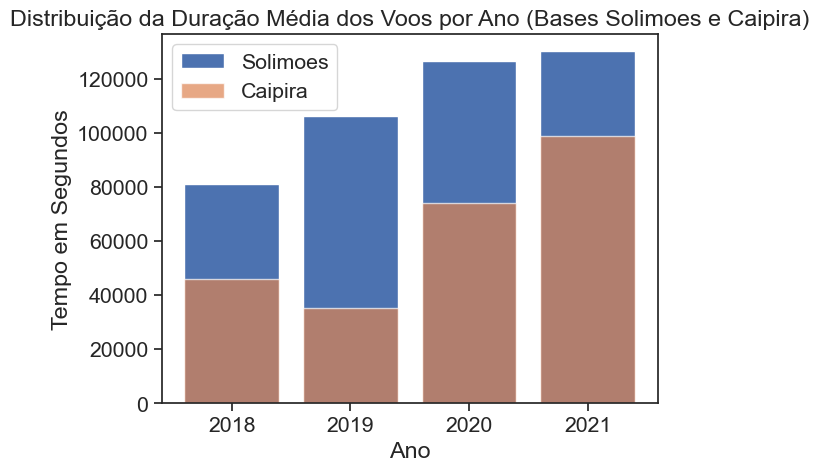

In [23]:
distribuicao_solimoes_tempo = rota_solimoes.groupby(rota_solimoes['year_week'].str[:4])['average_duration'].sum()

distribuicao_caipira_tempo = rota_caipira.groupby(rota_caipira['year_week'].str[:4])['average_duration'].sum()

plt.bar(distribuicao_solimoes_tempo.index, distribuicao_solimoes_tempo.values, label='Solimoes')
plt.bar(distribuicao_caipira_tempo.index, distribuicao_caipira_tempo.values, label='Caipira', alpha=0.7)  
plt.xlabel('Ano')
plt.ylabel('Tempo em Segundos')
plt.title('Distribuição da Duração Média dos Voos por Ano (Bases Solimoes e Caipira)')
plt.legend()
plt.show()

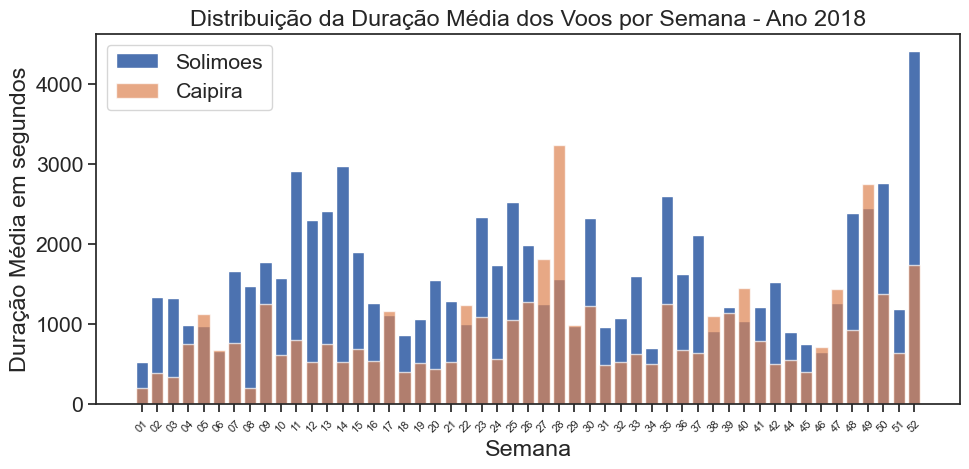

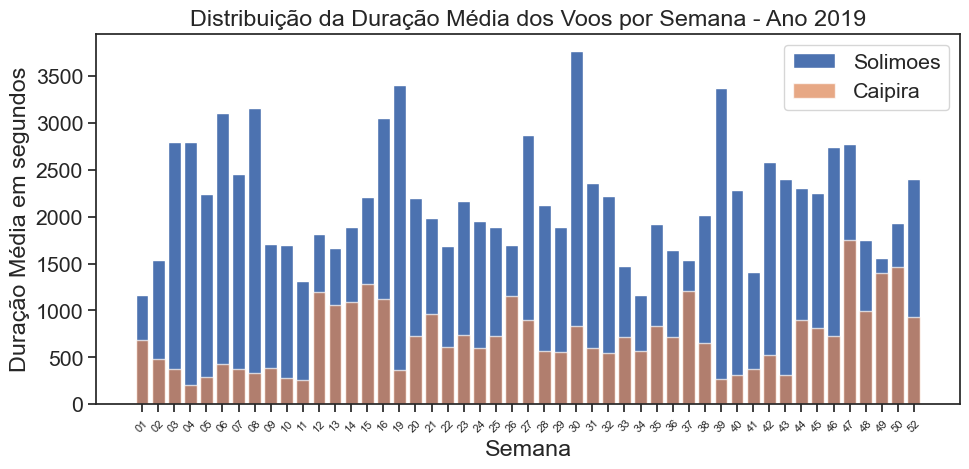

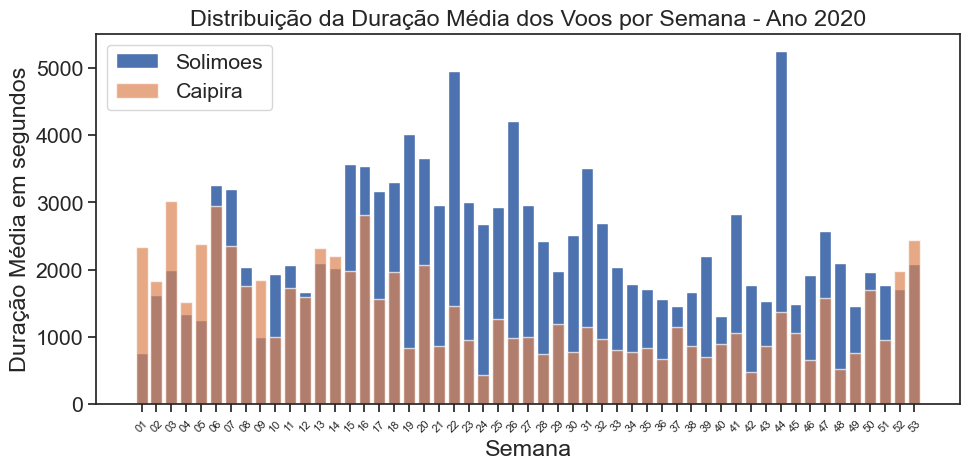

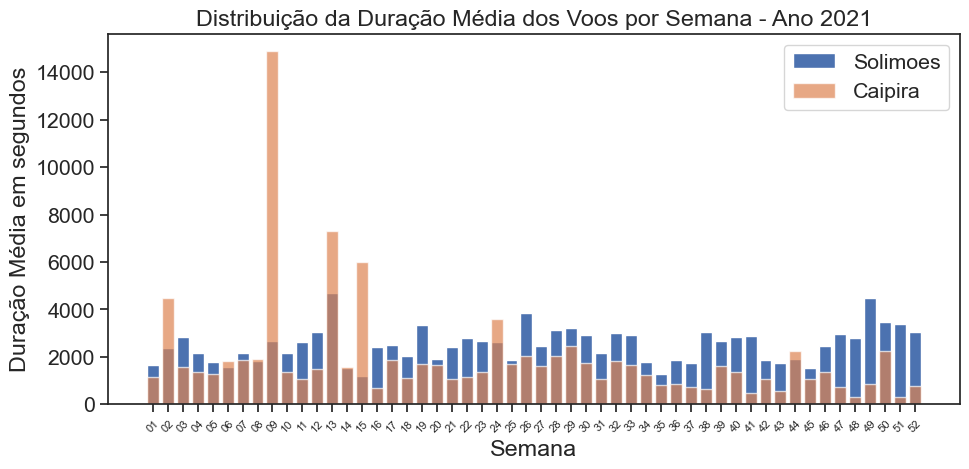

In [24]:
distribuicao_solimoes_tempo = rota_solimoes.groupby('year_week')['average_duration'].sum()

distribuicao_caipira_tempo = rota_caipira.groupby('year_week')['average_duration'].sum()

anos = ['2018', '2019', '2020', '2021']

for ano in anos:
    distribuicao_solimoes_ano_tempo = distribuicao_solimoes_tempo[distribuicao_solimoes_tempo.index.str.startswith(ano)]
    distribuicao_caipira_ano_tempo = distribuicao_caipira_tempo[distribuicao_caipira_tempo.index.str.startswith(ano)]

    plt.figure(figsize=(10, 5))
    plt.bar(distribuicao_solimoes_ano_tempo.index.str[-2:], distribuicao_solimoes_ano_tempo.values, label='Solimoes')
    plt.bar(distribuicao_caipira_ano_tempo.index.str[-2:], distribuicao_caipira_ano_tempo.values, label='Caipira', alpha=0.7)
    
    plt.xlabel('Semana')
    plt.ylabel('Duração Média em segundos')
    plt.title(f'Distribuição da Duração Média dos Voos por Semana - Ano {ano}')
    plt.xticks(rotation=45, fontsize=8)  
    plt.legend()
    plt.tight_layout()
    plt.show()

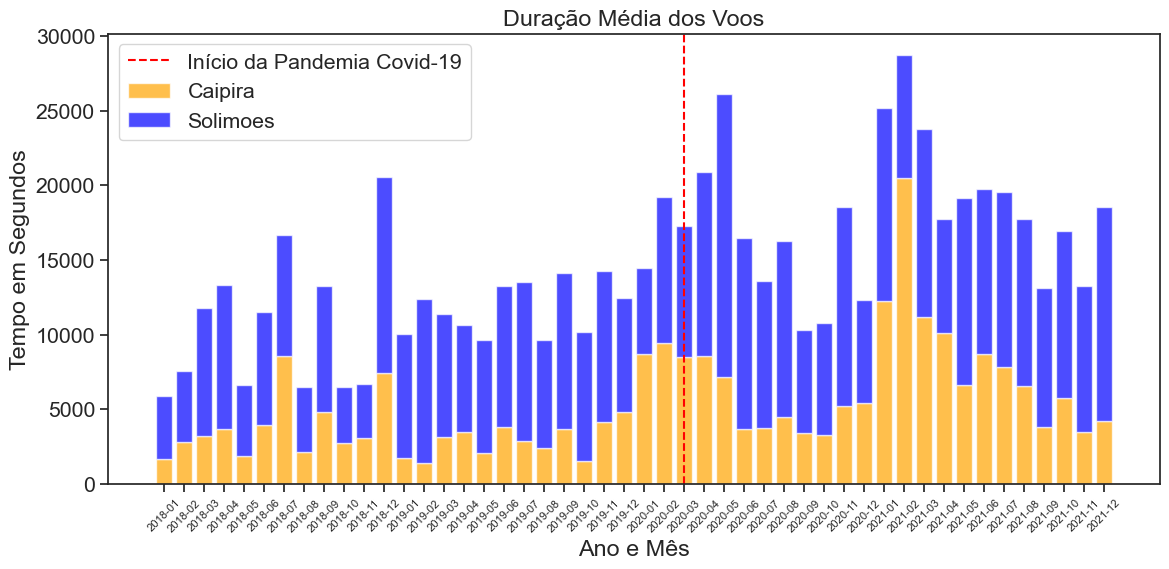

In [25]:
rota_solimoes['year_month'] = pd.to_datetime(rota_solimoes['year_week'] + '-0', format='%Y_%U-%w').dt.strftime('%Y-%m')
rota_caipira['year_month'] = pd.to_datetime(rota_caipira['year_week'] + '-0', format='%Y_%U-%w').dt.strftime('%Y-%m')

rota_solimoes['Rota'] = 'Solimoes'
rota_caipira['Rota'] = 'Caipira'
rotas_concatenadas = pd.concat([rota_solimoes, rota_caipira])

rotas_concatenadas = rotas_concatenadas[(rotas_concatenadas['year_month'] >= '2018-01') & (rotas_concatenadas['year_month'] <= '2021-12')]

distribuicao_rotas_tempo = rotas_concatenadas.groupby(['year_month', 'Rota'])['average_duration'].sum().unstack()

plt.figure(figsize=(12, 6))
colors = ['orange', 'blue']  
bottom = None
for rota, color in zip(distribuicao_rotas_tempo.columns, colors):
    plt.bar(distribuicao_rotas_tempo.index, distribuicao_rotas_tempo[rota], color=color, alpha=0.7, label=rota, bottom=bottom)
    if bottom is None:
        bottom = distribuicao_rotas_tempo[rota]
    else:
        bottom += distribuicao_rotas_tempo[rota]

plt.axvline(x='2020-03', color='red', linestyle='--', label='Início da Pandemia Covid-19')

plt.xticks(rotation=45, fontsize=8)

plt.xlabel('Ano e Mês')
plt.ylabel('Tempo em Segundos')
plt.title('Duração Média dos Voos')
plt.legend()
plt.tight_layout()
plt.show()

## Séries Temporais

Aqui serrão plotadas as séries temporais das bases Solim~es, Caipíras e All_Flights levando em consideração a quantidade de voos por semana ao longo do tempo, entre aprimeira semana de 2018 e a última de 2021

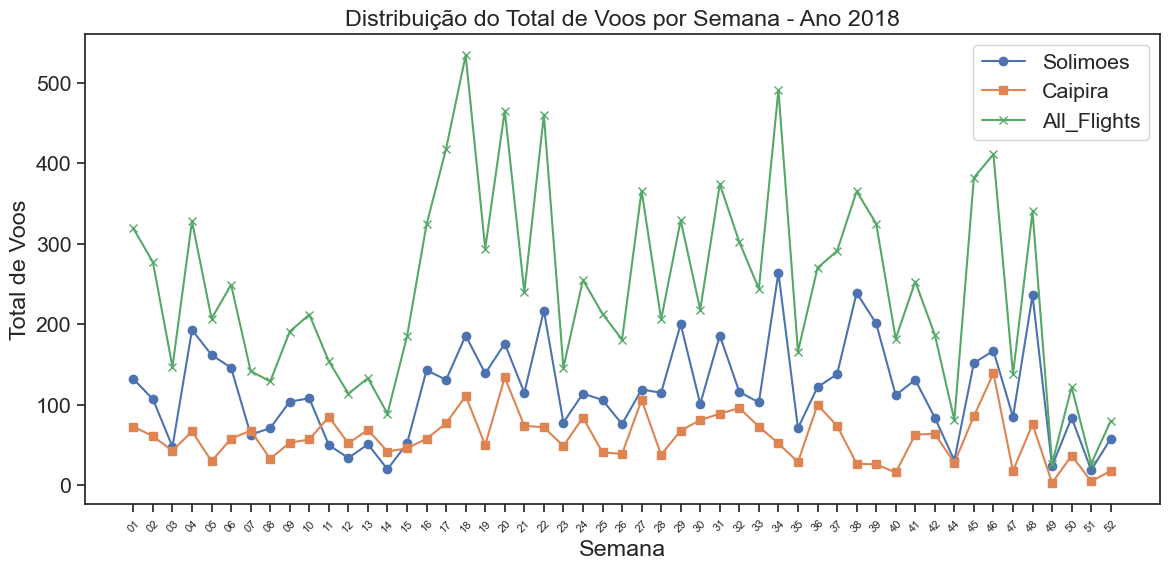

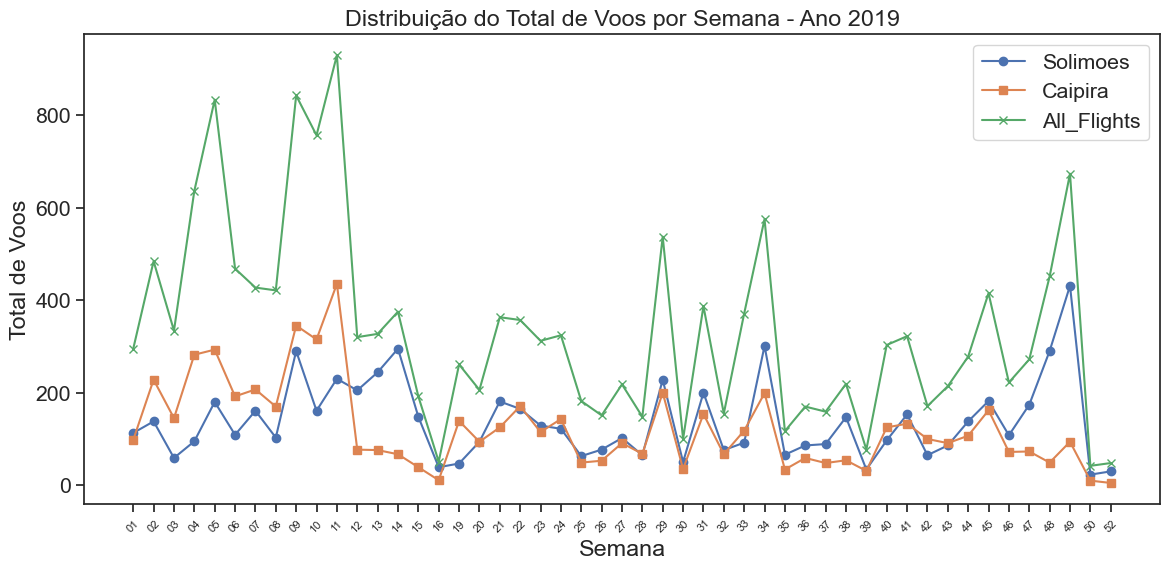

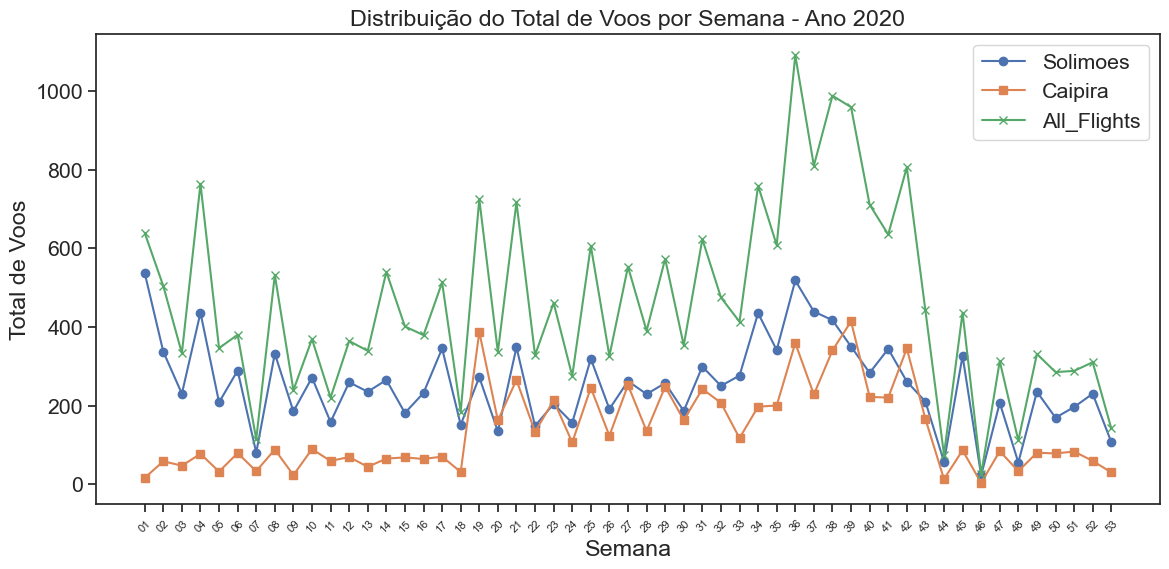

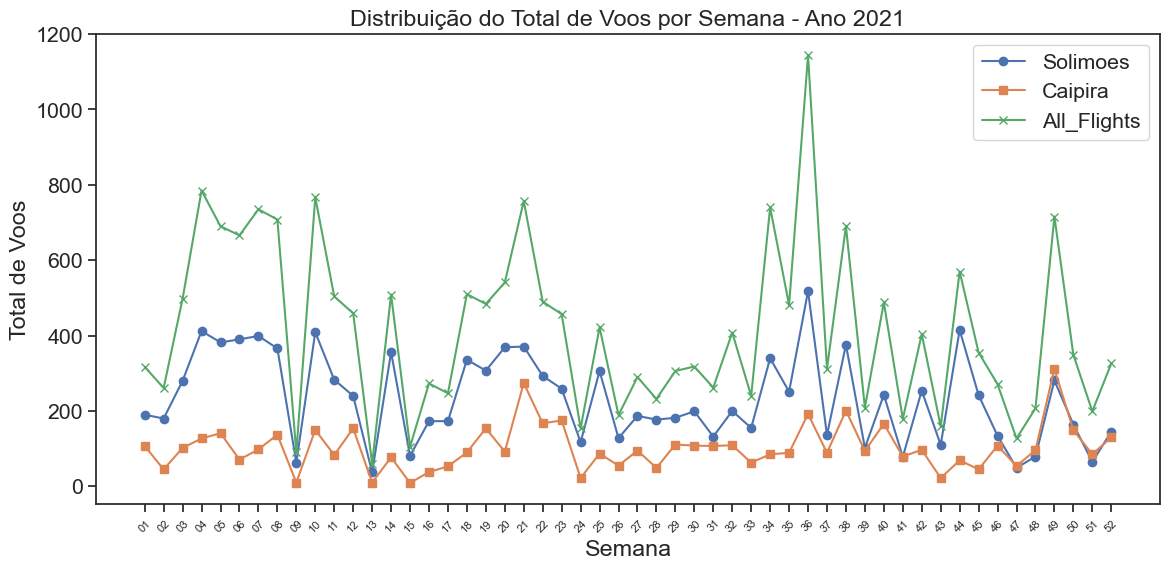

In [26]:
import matplotlib.pyplot as plt

distribuicao_all_flights = all_flights.groupby('year_week')['total_flights'].sum()

anos = ['2018', '2019', '2020', '2021']

for ano in anos:
    distribuicao_solimoes_ano = distribuicao_solimoes[distribuicao_solimoes.index.str.startswith(ano)]
    distribuicao_caipira_ano = distribuicao_caipira[distribuicao_caipira.index.str.startswith(ano)]
    distribuicao_all_flights_ano = distribuicao_all_flights[distribuicao_all_flights.index.str.startswith(ano)]

    plt.figure(figsize=(12, 6))

    # Gráfico para Solimões
    plt.plot(distribuicao_solimoes_ano.index.str[-2:], distribuicao_solimoes_ano.values, label='Solimoes', marker='o')

    # Gráfico para Caipira
    plt.plot(distribuicao_caipira_ano.index.str[-2:], distribuicao_caipira_ano.values, label='Caipira', marker='s')

    # Gráfico para All_Flights
    plt.plot(distribuicao_all_flights_ano.index.str[-2:], distribuicao_all_flights_ano.values, label='All_Flights', marker='x')

    plt.xlabel('Semana')
    plt.ylabel('Total de Voos')
    plt.title(f'Distribuição do Total de Voos por Semana - Ano {ano}')
    plt.xticks(rotation=45, fontsize=8)  
    plt.legend()
    plt.tight_layout()
    plt.show()

Aqui será feita a distribuição dos tempo médop de vôo para as mesmas bases no mesmo período de tempo

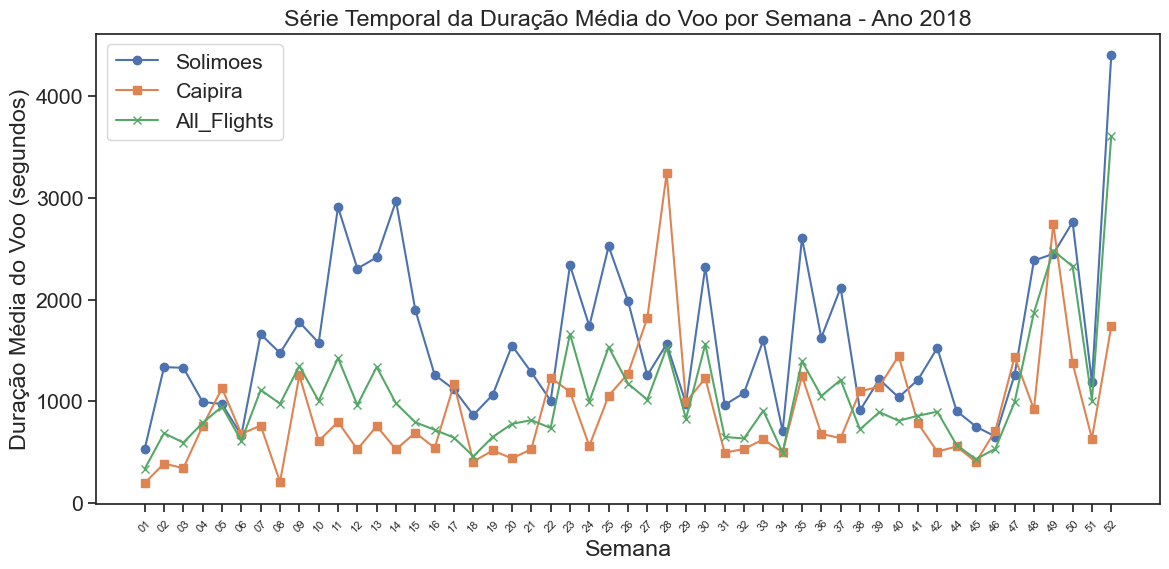

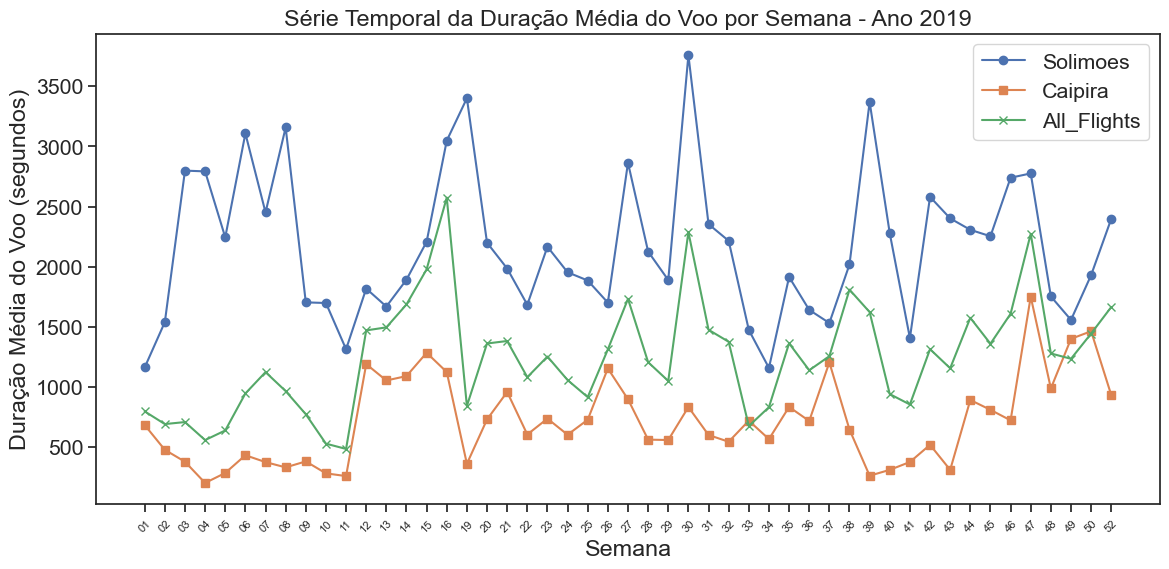

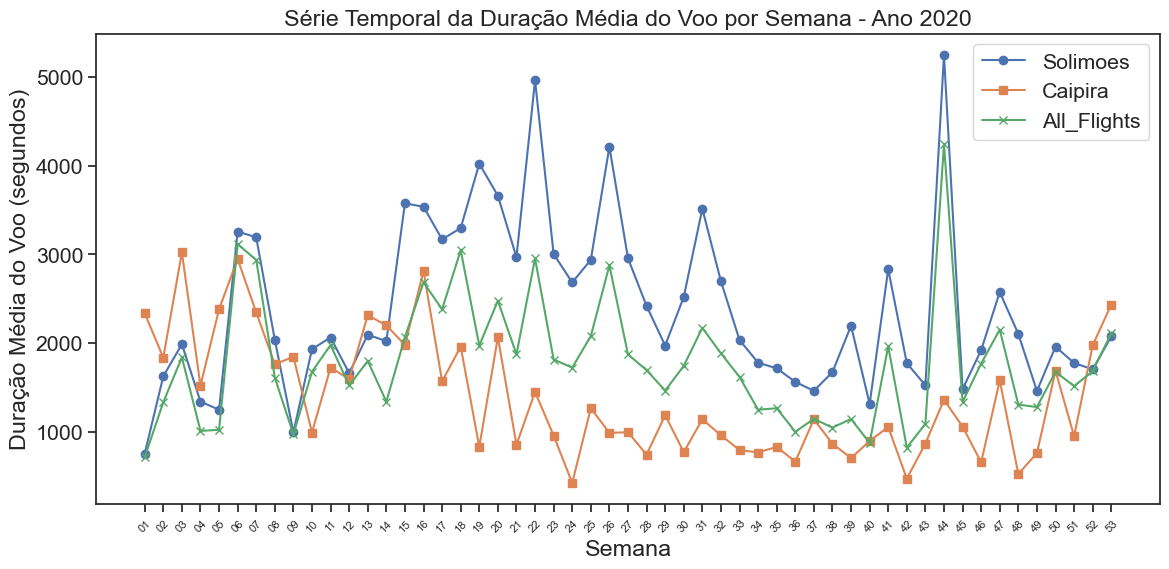

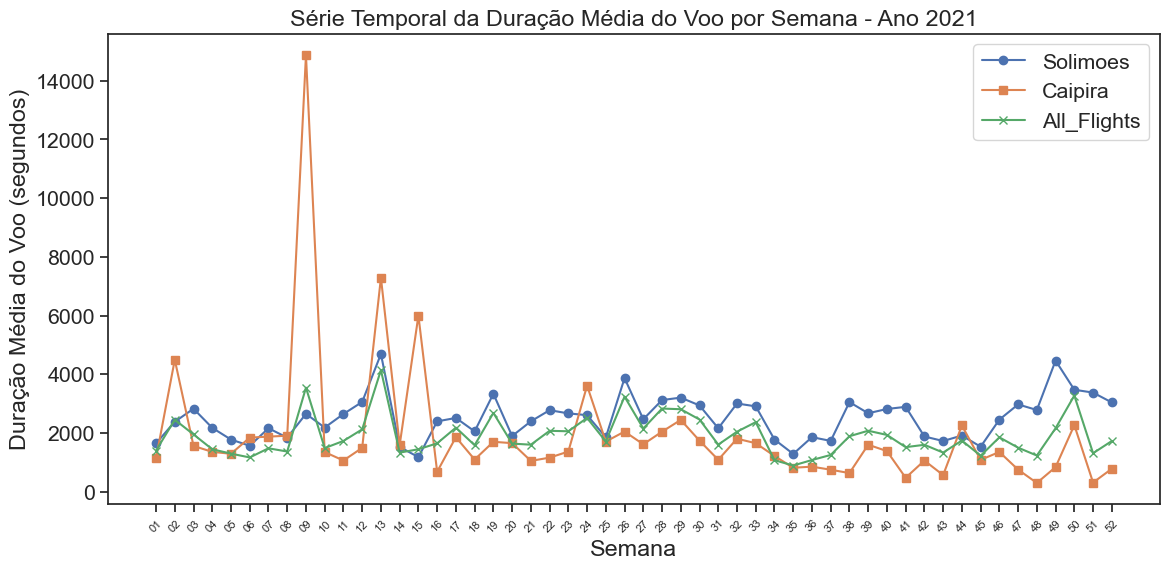

In [27]:
import matplotlib.pyplot as plt

# Calcular a duração média do voo para cada base
distribuicao_solimoes_tempo = rota_solimoes.groupby('year_week')['average_duration'].sum()
distribuicao_caipira_tempo = rota_caipira.groupby('year_week')['average_duration'].sum()
distribuicao_all_flights_tempo = all_flights.groupby('year_week')['average_duration'].sum()

anos = ['2018', '2019', '2020', '2021']

for ano in anos:
    distribuicao_solimoes_ano_tempo = distribuicao_solimoes_tempo[distribuicao_solimoes_tempo.index.str.startswith(ano)]
    distribuicao_caipira_ano_tempo = distribuicao_caipira_tempo[distribuicao_caipira_tempo.index.str.startswith(ano)]
    distribuicao_all_flights_ano_tempo = distribuicao_all_flights_tempo[distribuicao_all_flights_tempo.index.str.startswith(ano)]

    plt.figure(figsize=(12, 6))

    # Gráfico para Solimões
    plt.plot(distribuicao_solimoes_ano_tempo.index.str[-2:], distribuicao_solimoes_ano_tempo.values, label='Solimoes', marker='o')

    # Gráfico para Caipira
    plt.plot(distribuicao_caipira_ano_tempo.index.str[-2:], distribuicao_caipira_ano_tempo.values, label='Caipira', marker='s')

    # Gráfico para All_Flights
    plt.plot(distribuicao_all_flights_ano_tempo.index.str[-2:], distribuicao_all_flights_ano_tempo.values, label='All_Flights', marker='x')

    plt.xlabel('Semana')
    plt.ylabel('Duração Média do Voo (segundos)')
    plt.title(f'Série Temporal da Duração Média do Voo por Semana - Ano {ano}')
    plt.xticks(rotation=45, fontsize=8)  
    plt.legend()
    plt.tight_layout()
    plt.show()